# **Making our own Linear Regression class**

In [97]:
import numpy as np
from sklearn.datasets import load_diabetes

In [98]:
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
37,-0.009147,-0.044642,0.011039,-0.057313,-0.024960,-0.042963,0.030232,-0.039493,0.017036,-0.005220
170,0.023546,0.050680,-0.020218,-0.036656,-0.013953,-0.015092,0.059685,-0.039493,-0.096435,-0.017646
400,-0.023677,-0.044642,0.045529,0.090729,-0.018080,-0.035447,0.070730,-0.039493,-0.034522,-0.009362
286,-0.038207,-0.044642,-0.054707,-0.077970,-0.033216,-0.086490,0.140681,-0.076395,-0.019198,-0.005220
...,...,...,...,...,...,...,...,...,...,...
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025953,-0.001078
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061176,-0.013504
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036060,-0.042499


In [129]:
x,y = load_diabetes(return_X_y= True)

In [130]:
# class MeraLR:
    
#     def __init__(self):
#         self.coef_ = None
#         self.intercept_ = None
        
#     def fit(self,x_train,y_train):
#         x_train_ones = np.hstack((np.ones((y_train.shape[0],1)), x_train))
#         # calcuate the coeffs
#         betas = np.linalg.inv(x_train_ones.T@x_train_ones)@(x_train_ones.T)@(y_train.to_numpy().reshape((-1,1)))
#         self.intercept_ = betas[0]
#         self.coef_ = betas[1:]
    
#     def predict(self,x_test):
#         y_pred = np.dot(x_test,self.coef_) + self.intercept_
#         return y_pred
class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        

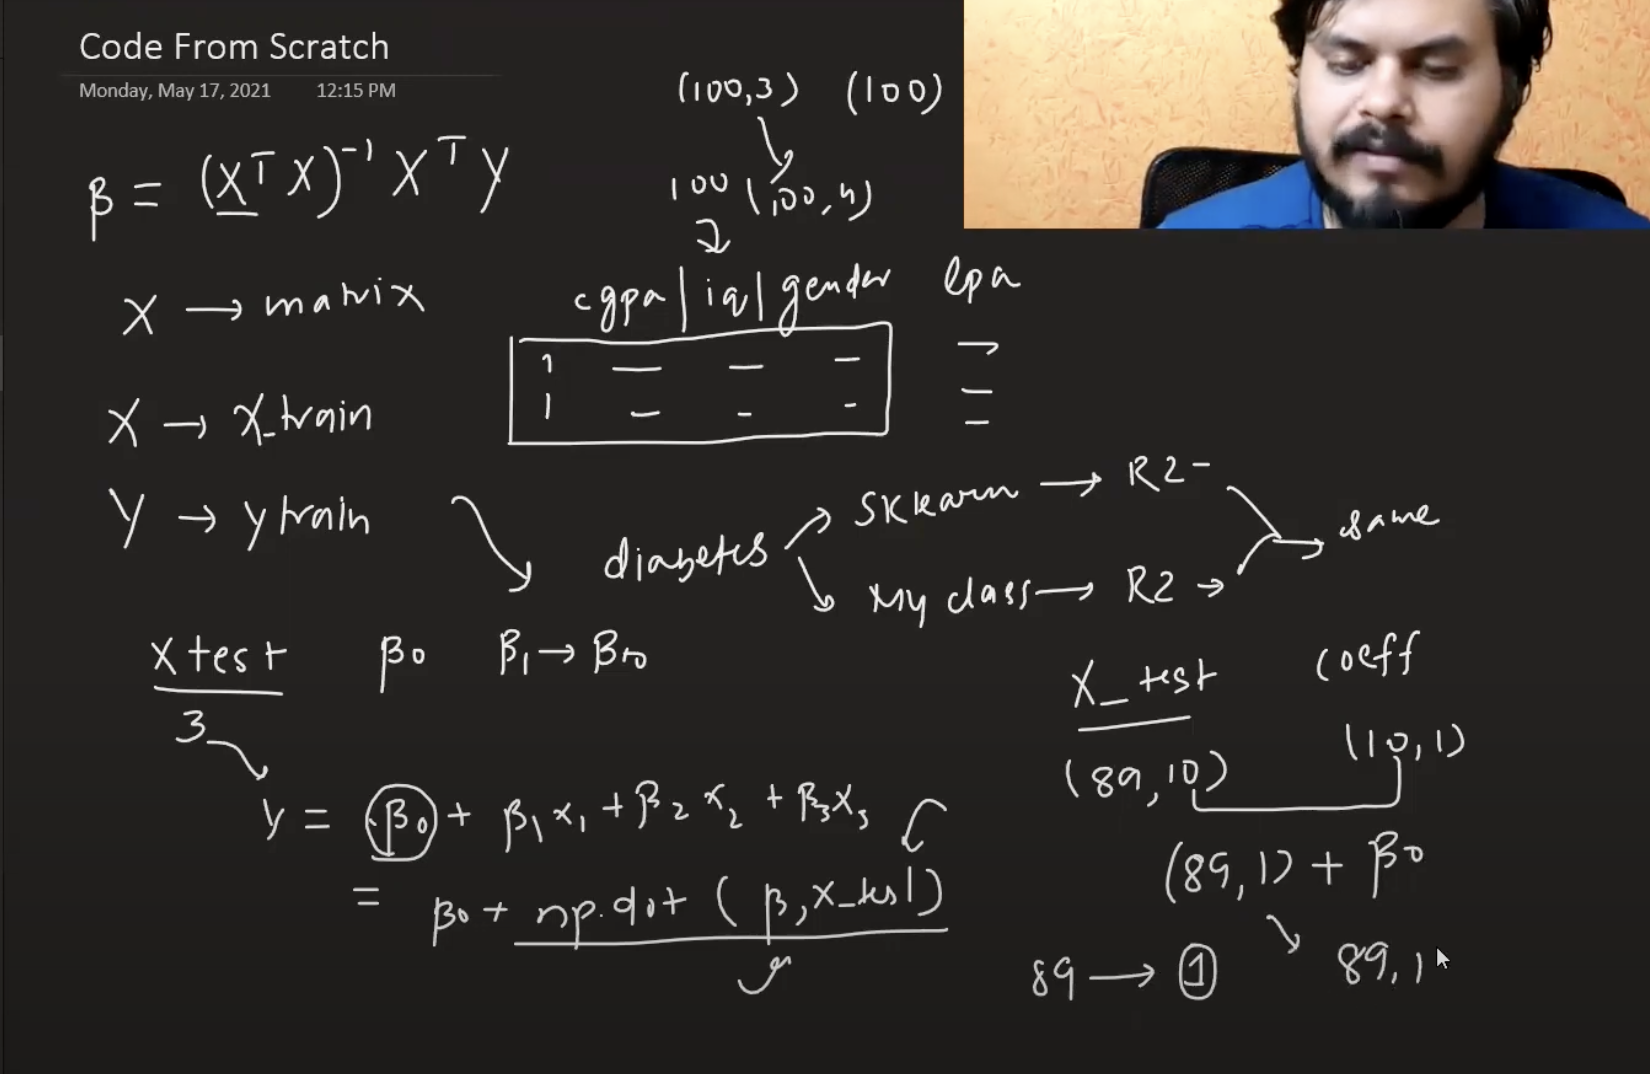

In [101]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [110]:
x_train.shape

(353, 10)

In [111]:
y_train.shape

(353,)

In [131]:
lr = MeraLR()

In [132]:
lr.fit(x_train,y_train)

In [133]:
y_pred = lr.predict(x_test)

In [134]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968